In [1]:
import pandas as pd
import numpy as np
import random as rd
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import statsmodels.tsa.api as smt
import statsmodels.api as sn
from statsmodels.tsa.stattools import adfuller


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("/Users/mehrac/Downloads/wiki_machine_learning.csv",delimiter=" ")
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [4]:
a = df.loc[df['count'] == 0]
a

,date,count,lang,page,rank,month,title
104,2015-02-05,0,en,Machine_learning,8708,201502,Machine_learning


In [5]:
df.drop(df[df['count'] == 0].index, inplace = True)


In [6]:
df['date'].min(), df['date'].max()


('2015-01-01', '2016-01-20')

In [7]:
df.head()


,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [8]:
df.reset_index(drop=True, inplace=True)


In [9]:
df.shape

(383, 7)

In [10]:
df.date = pd.to_datetime(df.date)


In [11]:
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)
plotly_df(df.set_index("date")[["count"]])

In [12]:
df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389
382,2016-01-20,3559


In [13]:
model= Prophet(yearly_seasonality=True, interval_width=0.95)
model.fit(df)

18:43:19 - cmdstanpy - INFO - Chain [1] start processing
18:43:19 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
ft=model.make_future_dataframe(periods=30)
pred=model.predict(ft)
pred[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
408,2016-02-15,2935.327401,2313.966857,3508.481230
409,2016-02-16,3182.283461,2598.072779,3767.144479
410,2016-02-17,3086.640828,2510.312905,3704.027096
411,2016-02-18,2990.481507,2377.211038,3622.334081
412,2016-02-19,2685.273424,2044.233880,3260.347128


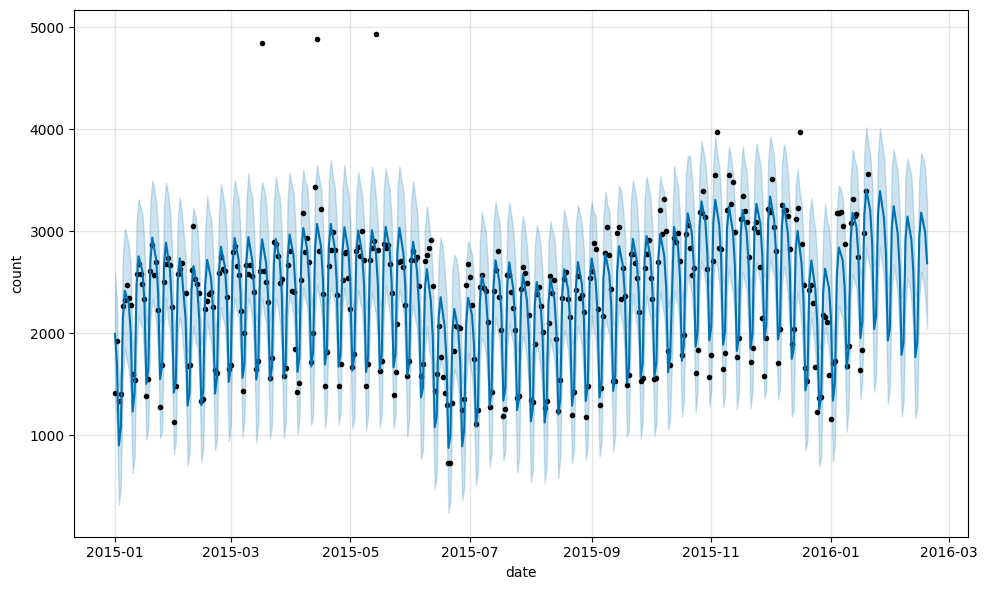

<Figure size 1600x800 with 0 Axes>

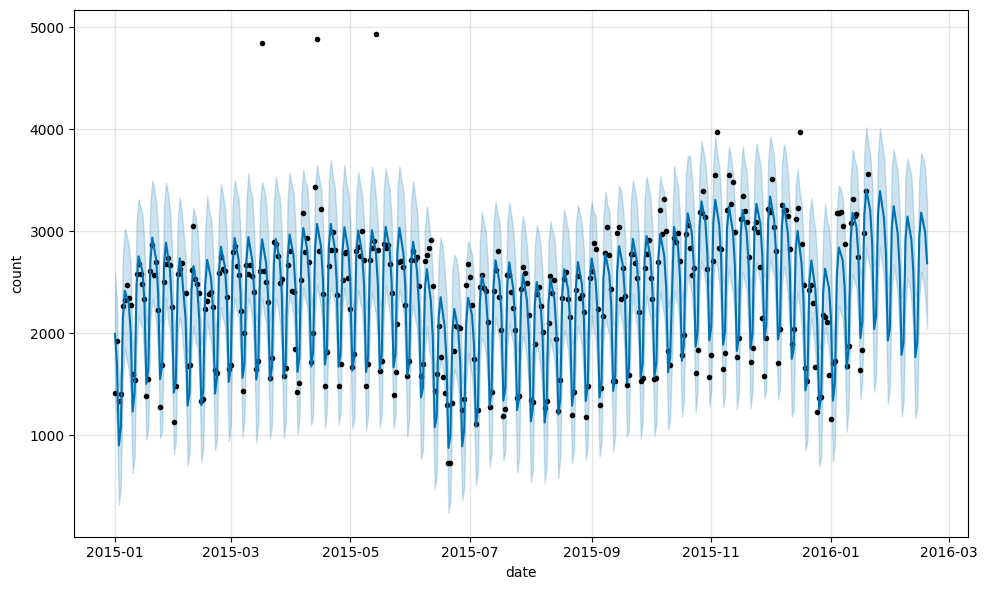

In [15]:
plt.figure(figsize=(16,8))
model.plot(pred, xlabel="date", ylabel="count")

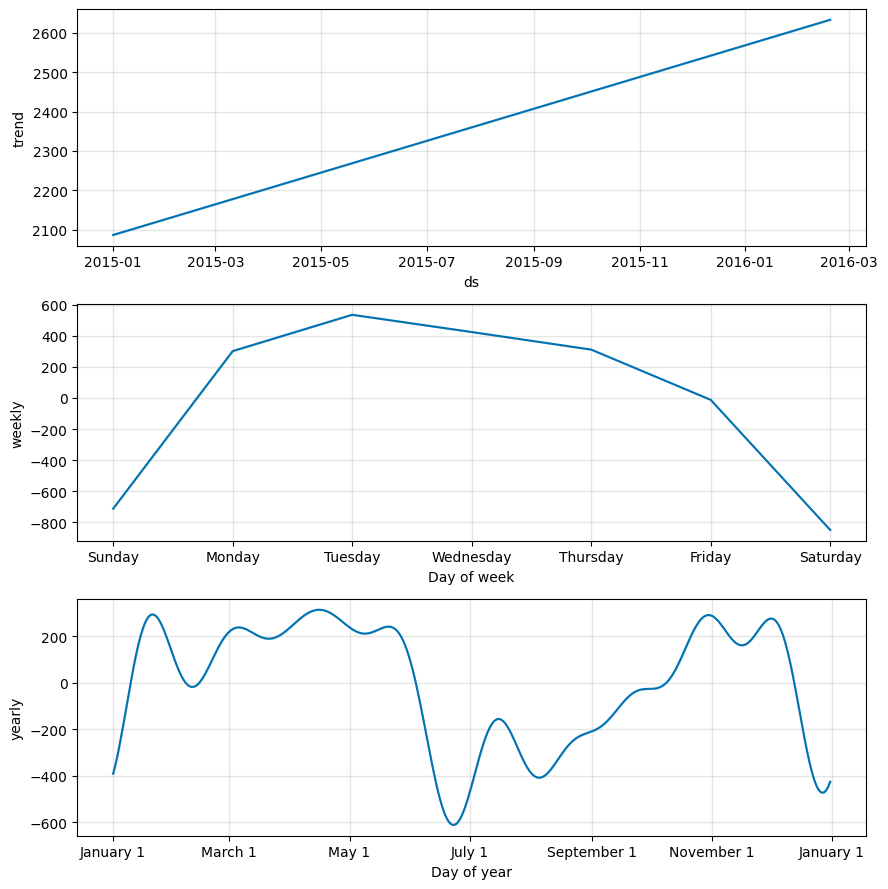

In [16]:
fig=model.plot_components(pred)

In [19]:
from neuralprophet import NeuralProphet

ModuleNotFoundError: No module named 'neuralprophet'

In [ ]:
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet()

In [ ]:
metrics = model.fit(df, freq="MS") 
future = model.make_future_dataframe(df, periods=30, n_historic_predictions=len(df)) 
forecast = model.predict(future)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="date", ylabel="cales", ax=ax);

In [ ]:
model.plot_parameters()

In [ ]:
df.tail()